In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gplearn.gplearn.genetic import SymbolicRegressor
from load_data import load_data
from benchmarks import run_experiment, categorical_variables_per_dataset, create_categorical_variable_dict
from interpret.glassbox import ExplainableBoostingClassifier, ExplainableBoostingRegressor

In [2]:
from pmlb import dataset_names

In [22]:
dataset_names

['GAMETES_Epistasis_2_Way_1000atts_0.4H_EDM_1_EDM_1_1',
 'GAMETES_Epistasis_2_Way_20atts_0.1H_EDM_1_1',
 'GAMETES_Epistasis_2_Way_20atts_0.4H_EDM_1_1',
 'GAMETES_Epistasis_3_Way_20atts_0.2H_EDM_1_1',
 'GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_50_EDM_2_001',
 'GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_75_EDM_2_001',
 'Hill_Valley_with_noise',
 'Hill_Valley_without_noise',
 'adult',
 'agaricus_lepiota',
 'allbp',
 'allhyper',
 'allhypo',
 'allrep',
 'analcatdata_aids',
 'analcatdata_asbestos',
 'analcatdata_authorship',
 'analcatdata_bankruptcy',
 'analcatdata_boxing1',
 'analcatdata_boxing2',
 'analcatdata_creditscore',
 'analcatdata_cyyoung8092',
 'analcatdata_cyyoung9302',
 'analcatdata_dmft',
 'analcatdata_fraud',
 'analcatdata_germangss',
 'analcatdata_happiness',
 'analcatdata_japansolvent',
 'analcatdata_lawsuit',
 'ann_thyroid',
 'appendicitis',
 'australian',
 'auto',
 'backache',
 'balance_scale',
 'biomed',
 'breast',
 'breast_cancer',
 'breast_cancer_wisconsin',
 'br

In [3]:
boston_df = load_data('boston')

In [4]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
X = boston_df
categories = []
categorical_variables = [3,8]
for i in categorical_variables:
    uniques = list(X.iloc[:,i].unique())
    categories.append(sorted(uniques))
categories

[[0, 1], [1, 2, 3, 4, 5, 6, 7, 8, 24]]

In [4]:
boston_df['RAD'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [2]:
task = 'regression'
dataset_name = 'boston'
global_seed = 0


gp_config = {
    'population_size':1,
    'generations':1,
    'function_set':('add','sub','mul','div','shape'),
    'verbose':True,
    'random_state':global_seed,
    'const_range':None,
    'n_jobs':1,
    'p_crossover':0.7,
    'p_subtree_mutation':0.05,
    'p_point_mutation':0.1,
    'p_hoist_mutation':0.05,
    'p_point_replace':0.2,
    'parsimony_coefficient':0.0,
    'metric': ('mse' if task == 'regression' else 'log loss'),
    'parsimony_coefficient':0.0,
    'optim_dict': {
        'alg':'adam',
        'lr': 1e-3,
        'max_n_epochs':500,
        'tol':1e-5,
        'n_iter_no_change':20,
        'task':task,
        'device':'cuda',
        'batch_size':20000
        }
    }
                
               
# esr_parameter_dict = {
#     # 'parsimony_coefficient': scipy.stats()
#     'optim_dict': DictionaryDistribution({
#         'alg':['adam'],
#         'lr': scipy.stats.loguniform(1e-5,1),
#         'max_n_epochs':[200],
#         'tol':[1e-4],
#         'n_iter_no_change':[10],
#         'task':[task],
#         'device':['cuda'],
#         'batch_size':[20000]
#     })
# }

esr_parameter_dict = None
if task == 'regression':
    esr = SymbolicRegressor(**gp_config, categorical_variables=create_categorical_variable_dict(dataset_name,task))
elif task == 'classification':
    esr = SymbolicClassifier(**gp_config, categorical_variables=create_categorical_variable_dict(dataset_name,task))

esr_score_mean, esr_score_std, model = run_experiment(dataset_name, esr, esr_parameter_dict, task, random_state=global_seed, return_model=True)


[ 0.          3.         -0.44271762 -0.48875892  0.38855151 -1.03022786
 -0.71085336 -0.37784489  1.18896988 -0.7004622  -1.13974354  0.44071346
  0.4394752 ]
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
sub(mul(shape(sub(mul(shape(sub(mul(add(add(mul(mul(div(shape(add(shape(X4), shape(X3))), shape(X8)), shape(X0)), shape(X9)), shape(X6)), shape(X12)), shape(X1)), shape(X7))), shape(X11)), shape(X2))), shape(X10)), shape(X5))
Did not converge in 500. Loss 0.24072018265724182
Training: 27.990764141082764
1
Best program: sub(mul(shape(sub(mul(shape(sub(mul(add(add(mul(mul(div(shape(add(shape(X4), shape(X3))), shape(X8)), shape(X0)), shape(X9)), shape(X6)), shape(X12)), shape(X1)), shape(X7))), shape(X11)), shape(X2))), shape(X10)), shape(X5))
   0    41.00         0.240098       41         

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
sub(mul(shape(sub(mul(shape(sub(mul(add(add(mul(mul(div(shape(add(shape(X4), shape(X3))), shape(X8)), shape(X0)), shape(X9)), shape(X6)), shape(X12)), shape(X1)), shape(X7))), shape(X11)), shape(X2))), shape(X10)), shape(X5))
Did not converge in 500. Loss 0.15756022930145264
Training: 26.653003931045532
1
Best program: sub(mul(shape(sub(mul(shape(sub(mul(add(add(mul(mul(div(shape(add(shape(X4), shape(X3))), shape(X8)), shape(X0)), shape(X9)), shape(X6)), shape(X12)), shape(X1)), shape(X7))), shape(X11)), shape(X2))), shape(X10)), shape(X5))
   0    41.00         0.157644       41         0.157644              N/A      0.00s
[ 0.          3.         -0.38734943 -0.51258328  0.41184891 -1.00916049
 -0.70227627 -0.36113108  1.16928762 -0.66874702 -

In [4]:
shapes = model._program.model.shape_functions

In [5]:
import torch

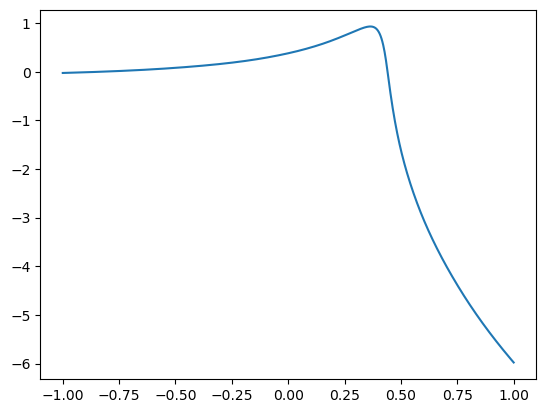

In [17]:
t = torch.linspace(-1,1,1000)
shapes.to(torch.device('cpu'))
plt.plot(t.cpu().numpy(),shapes[10](t.unsqueeze(1)).cpu().detach().numpy().flatten())


In [3]:
esr_score_mean

0.7329580728240026

In [7]:
task = 'regression'
dataset_name = 'feynman_I_40_1'
global_seed = 0
if task == 'regression':
    ebm = ExplainableBoostingRegressor(interactions=0)
elif task == 'classification':
    ebm = ExplainableBoostingClassifier(interactions=0)
# ebm_parameter_dict = {'binning':['uniform','quantile','quantile_humanized'],
#     'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.2]}
ebm_parameter_dict = None
ebm_mean, ebm_std, model = run_experiment(dataset_name, ebm, ebm_parameter_dict, task, random_state=global_seed, return_model=True)

10it [00:21,  2.19s/it]


In [10]:
ebm_mean, ebm_std

(0.7363615210354442, 0.002951975309754397)

In [5]:
model

ExplainableBoostingRegressor(feature_names=['feature_0001', 'feature_0002',
                                            'feature_0003', 'feature_0004',
                                            'feature_0005', 'feature_0006',
                                            'feature_0001 x feature_0002',
                                            'feature_0001 x feature_0003',
                                            'feature_0001 x feature_0005',
                                            'feature_0001 x feature_0004',
                                            'feature_0001 x feature_0006',
                                            'feature_0005 x feature_0006',
                                            'feature_0002 x feature_0006',
                                            'feature_0003 x feature_0006',
                                            'feature_0002 x feature_0004',
                                            'feature_0004 x feature_0006'],
                             feature_types=['continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'interaction', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction', 'interaction'],
                             random_state=0)

In [9]:
from interpret import show

ebm_global = model.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/2352521744048/ -->